In [181]:
import json
import matplotlib.pyplot as plt


In [185]:

with open("/home/jacobuni/uni-projects/p9-ssl_for_noise-robust_kws/results/results_paper_known.json", "r") as f: 
    known = json.load(f)

with open("/home/jacobuni/uni-projects/p9-ssl_for_noise-robust_kws/results/results_paper_unknown.json", "r") as f: 
    unknown = json.load(f)

labels = {"BC": "Baseline - clean", "BM": "Baseline - MTR", "DC": "Data2Vec - clean", "DPC": "Data2Vec - clean + noisy", "DPN": "Data2Vec - noisy", "DD": "Data2Vec - denoising"}
colors = {"BC": "silver", "BM": "dimgray", "DC": "mediumseagreen", "DPC": "mediumpurple", "DPN": "cornflowerblue", "DD": "red"}

In [186]:
results_known = {}
for kwt in known:
    results_known[kwt] = {}
    for snr in known[kwt]:
        for model in known[kwt][snr]:
            if model in results_known[kwt]:
                results_known[kwt][model][snr] = float(known[kwt][snr][model])
            else:
                results_known[kwt][model] = {}
                results_known[kwt][model][snr] = float(known[kwt][snr][model])

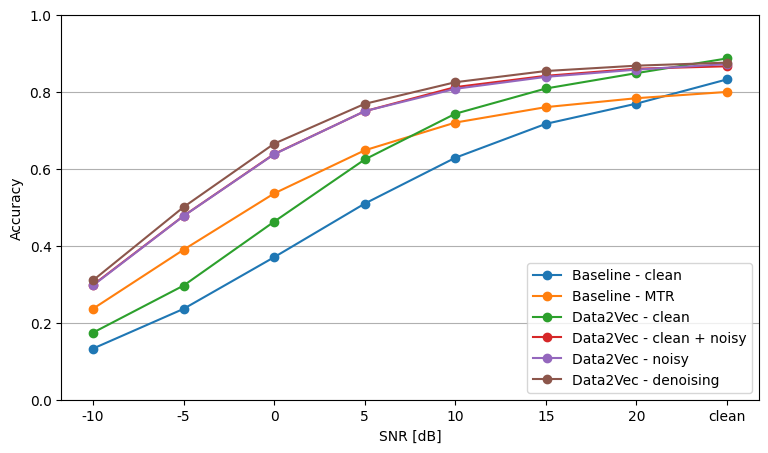

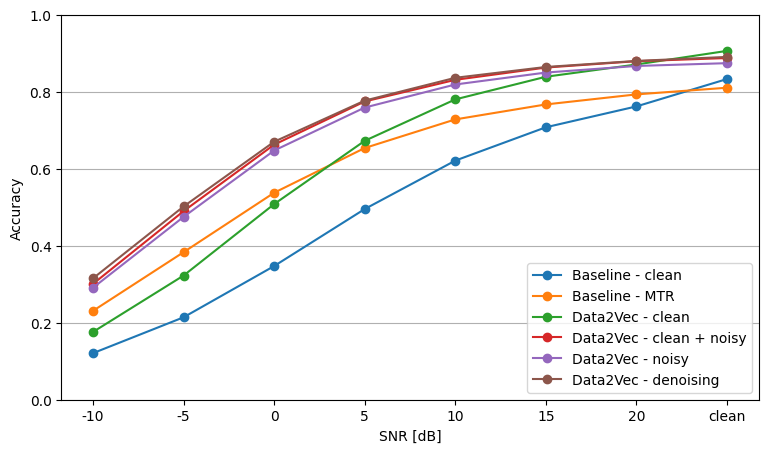

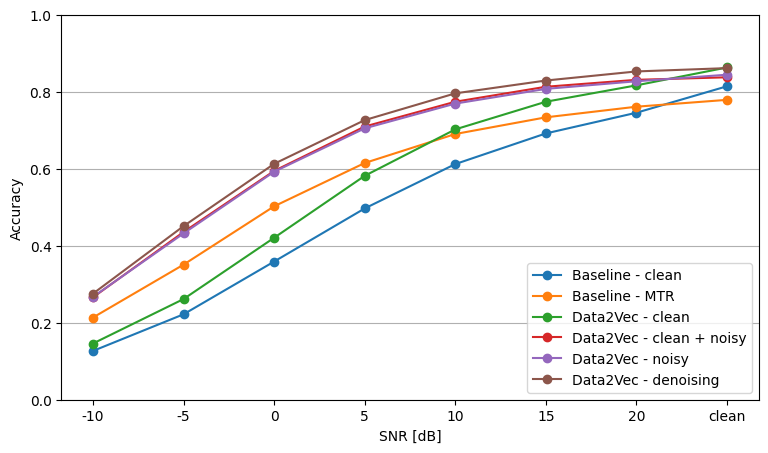

In [196]:
for kwt in results_known:
    fig, ax = plt.subplots(figsize=(9,5))
    for key in results_known[kwt]:
        ax.plot(results_known[kwt][key].keys(), results_known[kwt][key].values(), '-o', label = labels[key]) #, color=colors[key])
    # ax.set_ylim(0,1.1)
    ax.legend(loc = 'lower right')
    ax.set_xlabel('SNR [dB]')
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0,1)
    ax.yaxis.grid(True)
    # plt.title(kwt[:-1].upper() + "-" + kwt[-1])
    plt.savefig(f"{kwt}_known.pdf")
    plt.show()


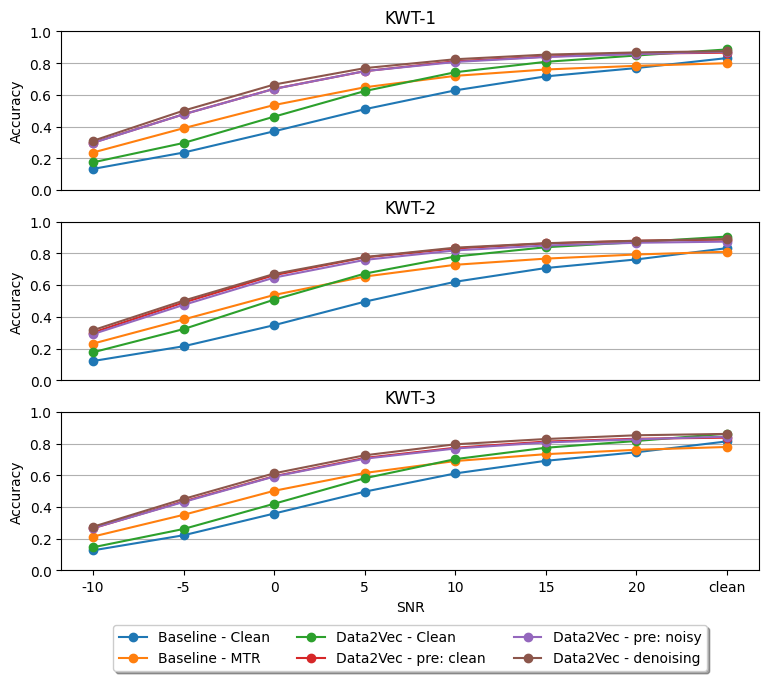

In [173]:
fig, ax = plt.subplots(3, 1, figsize=(9,7))
i = 0
for kwt in results_known:
    for key in results_known[kwt]:
        ax[i].plot(results_known[kwt][key].keys(), results_known[kwt][key].values(), '-o', label = labels[key]) #, color=colors[key])
    # ax.set_ylim(0,1.1)
    ax[i].set_ylabel('Accuracy')
    ax[i].yaxis.grid(True)
    ax[i].get_xaxis().set_visible(False)
    ax[i].set_ylim(0,1)
    ax[i].set_title(kwt[:-1].upper() + "-" + kwt[-1])
    i += 1
ax[-1].get_xaxis().set_visible(True)
ax[-1].set_xlabel('SNR')
ax[-1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=3)
# plt.title(kwt[:-1].upper() + "-" + kwt[-1])
plt.savefig(f"all_known.png", bbox_inches='tight')
plt.show()

/tmp/ipykernel_95489/3528121660.py:27: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(f"all_known.png", bbox_inches='tight')
/home/jacobuni/miniconda3/envs/sslkwsenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


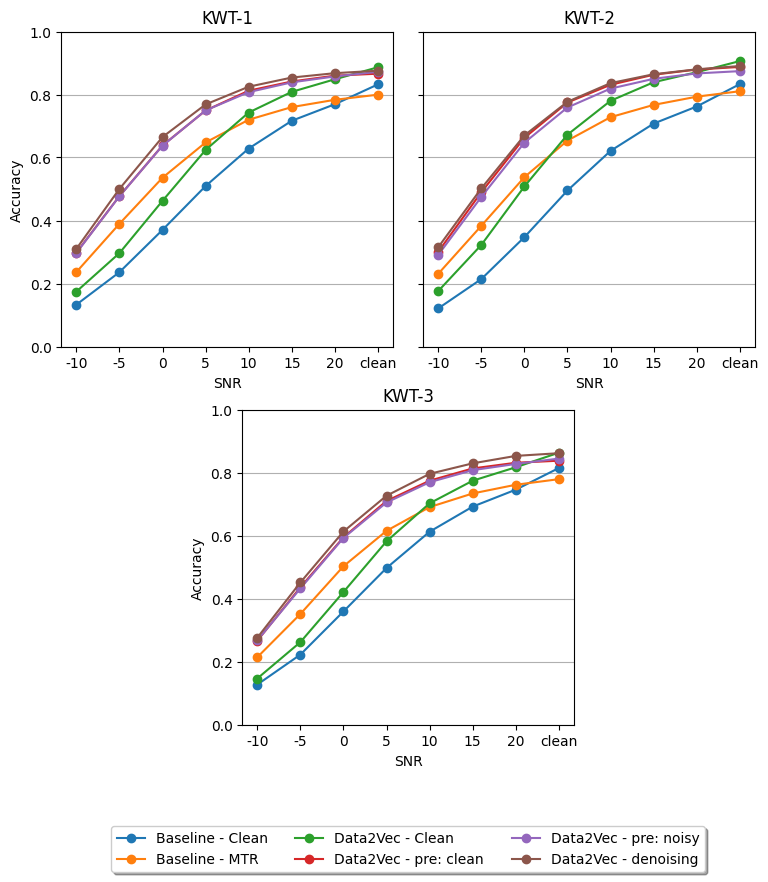

In [174]:
ax = plt.figure(layout="constrained", figsize=(8.95,9)).subplot_mosaic(
    """
    AABB
    .CC.
    """
)
plot = ['A', 'B', 'C']
i = 0
for kwt in results_known:
    for key in results_known[kwt]:
        ax[plot[i]].plot(results_known[kwt][key].keys(), results_known[kwt][key].values(), '-o', label = labels[key]) #, color=colors[key])
    # ax.set_ylim(0,1.1)
    ax[plot[i]].set_ylabel('Accuracy')
    ax[plot[i]].yaxis.grid(True)
    ax[plot[i]].set_ylim(0,1)
    ax[plot[i]].set_title(kwt[:-1].upper() + "-" + kwt[-1])
    ax[plot[i]].get_xaxis().set_visible(True)
    ax[plot[i]].set_xlabel('SNR')
    i += 1

ax['C'].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=3)
ax['B'].set_yticklabels([])
ax['B'].set_ylabel('')

# plt.title(kwt[:-1].upper() + "-" + kwt[-1])
# plt.tight_layout()
plt.savefig(f"all_known.png", bbox_inches='tight')
plt.show()



In [141]:
ax

{'A': <AxesSubplot:label='A'>,
 'B': <AxesSubplot:label='B'>,
 'C': <AxesSubplot:label='C'>}

In [100]:
perc_inc_list = []
for snr in known["kwt1"]:
    prc_in = ((float(known["kwt1"][snr]["DD"]) - float(known["kwt1"][snr]["BM"]))/float(known["kwt1"][snr]["BM"]))*100
    perc_inc_list.append(prc_in)
final_prc_in = sum(perc_inc_list)/len(perc_inc_list)
perc_inc_list

[31.18916631400761,
 28.439425051334688,
 24.11347517730496,
 18.632293917875874,
 14.557577441311295,
 12.342105263157894,
 10.789070480081717,
 9.51844903064416]

In [101]:
final_prc_in

18.697695334464772

In [102]:
perc_inc_list = []
for snr in known["kwt2"]:
    prc_in = ((float(known["kwt2"][snr]["DD"]) - float(known["kwt2"][snr]["BM"]))/float(known["kwt2"][snr]["BM"]))*100
    perc_inc_list.append(prc_in)
final_prc_in = sum(perc_inc_list)/len(perc_inc_list)

In [105]:
final_prc_in

18.56961168920311

In [104]:
perc_inc_list = []
for snr in known["kwt3"]:
    prc_in = ((float(known["kwt3"][snr]["DD"]) - float(known["kwt3"][snr]["BM"]))/float(known["kwt3"][snr]["BM"]))*100
    perc_inc_list.append(prc_in)
final_prc_in = sum(perc_inc_list)/len(perc_inc_list)

In [188]:
results_unknown = {}
for kwt in unknown:
    results_unknown[kwt] = {}
    for snr in unknown[kwt]:
        for model in unknown[kwt][snr]:
            if model in results_unknown[kwt]:
                results_unknown[kwt][model][snr] = float(unknown[kwt][snr][model])
            else:
                results_unknown[kwt][model] = {}
                results_unknown[kwt][model][snr] = float(unknown[kwt][snr][model])

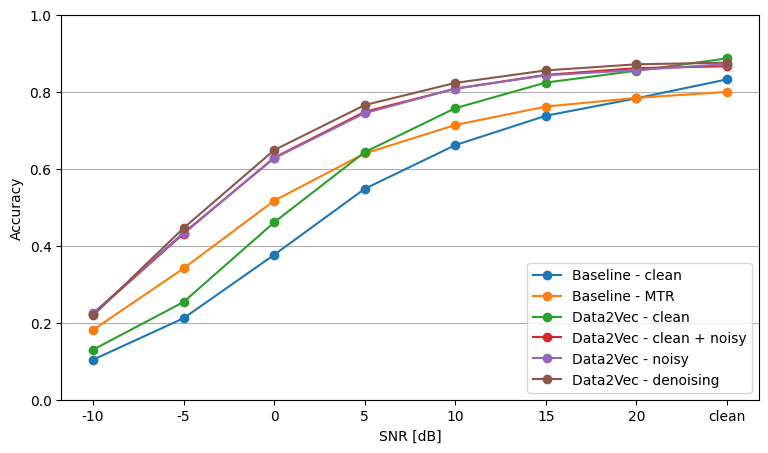

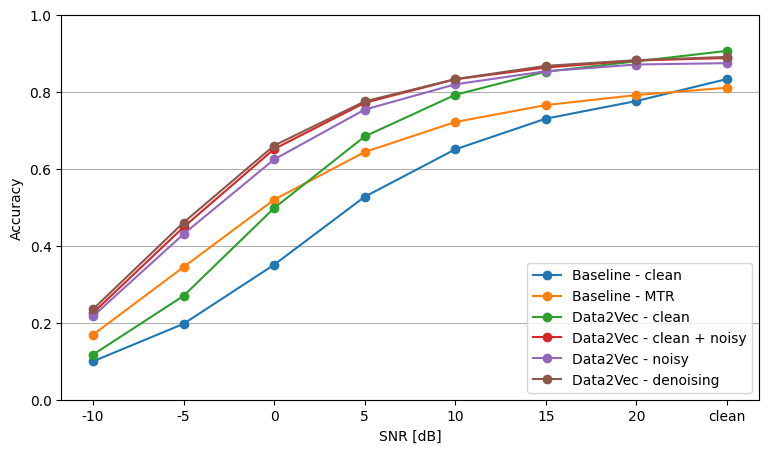

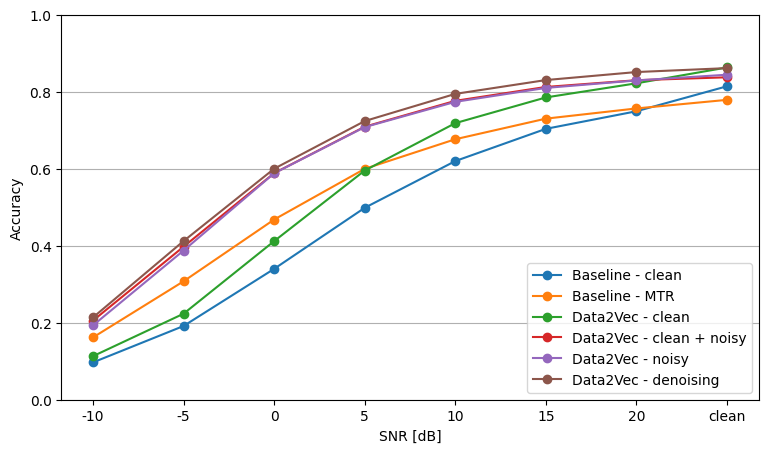

In [195]:
for kwt in results_unknown:
    fig, ax = plt.subplots(figsize=(9,5))
    for key in results_unknown[kwt]:
        ax.plot(results_unknown[kwt][key].keys(), results_unknown[kwt][key].values(), '-o', label = labels[key]) #, color=colors[key])
    # ax.set_ylim(0,1.1)
    ax.legend(loc = 'lower right')
    ax.set_xlabel('SNR [dB]')
    ax.set_ylabel('Accuracy')
    ax.yaxis.grid(True)
    ax.set_ylim(0,1)
    # plt.title(kwt[:-1].upper() + "-" + kwt[-1])
    plt.savefig(f"{kwt}_unknown.pdf")
    plt.show()


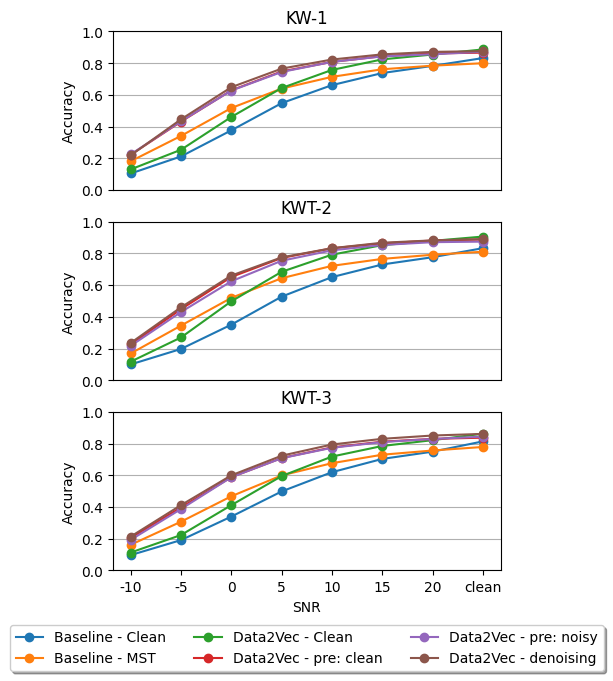

In [168]:
fig, ax = plt.subplots(3, 1, figsize=(5,7))
i = 0
for kwt in results_unknown:
    for key in results_unknown[kwt]:
        ax[i].plot(results_unknown[kwt][key].keys(), results_unknown[kwt][key].values(), '-o', label = labels[key]) #, color=colors[key])
    # ax.set_ylim(0,1.1)
    ax[i].set_ylabel('Accuracy')
    ax[i].yaxis.grid(True)
    ax[i].get_xaxis().set_visible(False)
    ax[i].set_ylim(0,1)
    ax[i].set_title(kwt[:-1].upper() + "-" + kwt[-1])
    i += 1
ax[-1].get_xaxis().set_visible(True)
ax[-1].set_xlabel('SNR')
ax[-1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=3)
# plt.title(kwt[:-1].upper() + "-" + kwt[-1])
plt.savefig(f"all_unknown.png", bbox_inches='tight')
plt.show()

In [175]:
perc_inc_list = []
for snr in unknown["kwt1"]:
    prc_in = ((float(unknown["kwt1"][snr]["DD"]) - float(unknown["kwt1"][snr]["BM"]))/float(unknown["kwt1"][snr]["BM"]))*100
    perc_inc_list.append(prc_in)
final_prc_in = sum(perc_inc_list)/len(perc_inc_list)
perc_inc_list

[20.805739514348794,
 30.72412782175315,
 25.396518375241772,
 19.649835860559627,
 15.316704035874432,
 12.345679012345691,
 11.108277005483988,
 9.51844903064416]

In [176]:
final_prc_in

18.108166332031452

In [179]:
perc_inc_list = []
for snr in unknown["kwt2"]:
    prc_in = ((float(unknown["kwt2"][snr]["DD"]) - float(unknown["kwt2"][snr]["BM"]))/float(unknown["kwt2"][snr]["BM"]))*100
    perc_inc_list.append(prc_in)
final_prc_in = sum(perc_inc_list)/len(perc_inc_list)
final_prc_in

21.319177422361463

In [180]:
perc_inc_list = []
for snr in unknown["kwt3"]:
    prc_in = ((float(unknown["kwt3"][snr]["DD"]) - float(unknown["kwt3"][snr]["BM"]))/float(unknown["kwt3"][snr]["BM"]))*100
    perc_inc_list.append(prc_in)
final_prc_in = sum(perc_inc_list)/len(perc_inc_list)
final_prc_in

21.14399708007988